In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
import statsmodels.api as sm
from subprocess import call
from IPython.display import Image
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn.tree import plot_tree
from sklearn.linear_model import Lasso
from sklearn.model_selection import KFold
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# load classification models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
from xgboost import XGBClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
# Hierarchical Cluster
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/ML/Class 1 - EDA/Datasets/Problem5_Auto.csv")
df.head(10)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


In [ ]:
df.shape

(398, 9)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df.duplicated().sum().sum()

0

In [ ]:
df.describe()

,mpg,cylinders,displacement,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
df.describe(percentiles = [0.25, .5, .75, .98, .995]).T

,count,mean,std,min,25%,50%,75%,98%,99.5%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,40.806,44.3045,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.000,8.0000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,429.000,455.0000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,4732.180,4955.6300,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,21.806,23.7135,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.000,82.0000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.000,3.0000,3.0


array([[<Axes: title={'center': 'mpg'}>,
        <Axes: title={'center': 'cylinders'}>,
        <Axes: title={'center': 'displacement'}>,
        <Axes: title={'center': 'weight'}>],
       [<Axes: title={'center': 'acceleration'}>,
        <Axes: title={'center': 'model year'}>,
        <Axes: title={'center': 'origin'}>, <Axes: >]], dtype=object)

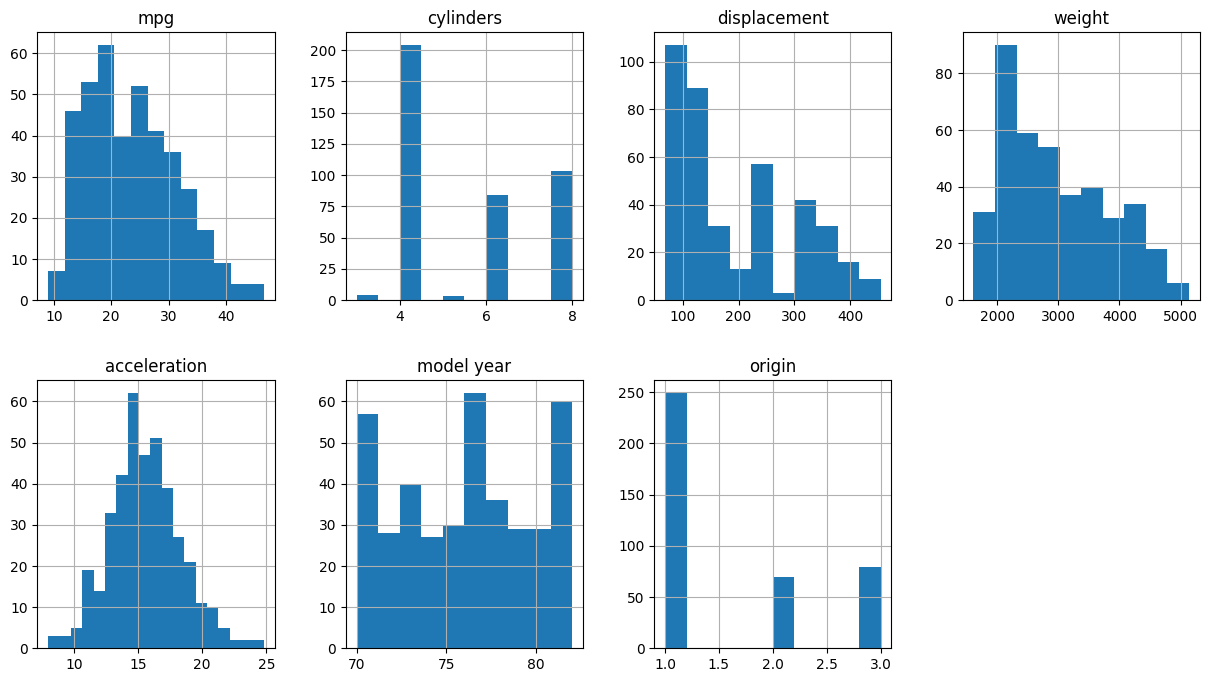

In [ ]:
df.hist(bins = "auto", figsize = (15, 8), layout= (2, 4), xlabelsize= 10, ylabelsize= 10)

In [ ]:
df['horsepower'] = pd.to_numeric(df['horsepower'].replace('?', np.nan))

In [ ]:
df['horsepower'].fillna(df['horsepower'].median(), inplace=True)

In [ ]:
temp_df = df.copy()

In [ ]:
temp_df = temp_df.drop('car name', axis = 1)

In [ ]:
temp_df.corr().style.background_gradient(cmap='YlOrRd').format(precision=2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.00,-0.78,-0.80,-0.77,-0.83,0.42,0.58,0.56
cylinders,-0.78,1.00,0.95,0.84,0.90,-0.51,-0.35,-0.56
displacement,-0.80,0.95,1.00,0.90,0.93,-0.54,-0.37,-0.61
horsepower,-0.77,0.84,0.90,1.00,0.86,-0.69,-0.41,-0.45
weight,-0.83,0.90,0.93,0.86,1.00,-0.42,-0.31,-0.58
acceleration,0.42,-0.51,-0.54,-0.69,-0.42,1.00,0.29,0.21
model year,0.58,-0.35,-0.37,-0.41,-0.31,0.29,1.00,0.18
origin,0.56,-0.56,-0.61,-0.45,-0.58,0.21,0.18,1.00


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
# scale data
scaler = StandardScaler()
X = scaler.fit_transform(temp_df)

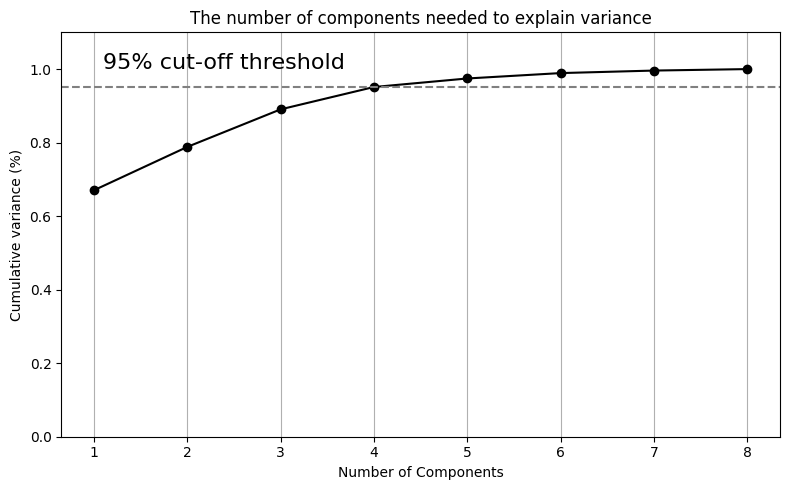

In [ ]:
# plot the Threshold for Explained Variance
pca = PCA().fit(X)

plt.rcParams["figure.figsize"] = (8,5)

fig, ax = plt.subplots()
xi = np.arange(1, 9, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='-', color='black')

plt.xlabel('Number of Components')
plt.xticks(np.arange(1, 9, step=1))
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='grey', linestyle='--')
plt.text(1.1, 1, '95% cut-off threshold', color = 'black', fontsize=16)

ax.grid(axis='x')
plt.tight_layout()
plt.savefig('pcavisualize_1.png', dpi=300)
plt.show()

as the curve cut

In [ ]:
pca = PCA(n_components=4)

principalComponents_4 = pca.fit_transform(X)

df_pca4 = pd.DataFrame(data = principalComponents_4
             , columns = ['pc1', 'pc2', 'pc3', 'pc4'])
df_pca4

,pc1,pc2,pc3,pc4
0,2.743366,-0.953963,0.229999,-0.518522
1,3.569887,-1.063818,-0.019296,-0.338542
2,3.061581,-1.172465,-0.127733,-0.652718
3,3.006883,-1.052208,0.185786,-0.464712
4,2.995942,-1.244821,-0.130446,-0.776146
...,...,...,...,...
393,-1.161872,1.336806,-0.662094,-0.779462
394,-4.055289,2.129625,0.610295,1.148463
395,-1.301018,0.636589,-1.739770,-1.772362
396,-1.731626,1.767002,0.042045,-0.357431


In [ ]:
variance_explained = pca.explained_variance_ratio_

for i, variance in enumerate(variance_explained):
    print(f"Variance explained by PCA{i + 1}: {variance:.4f}")

Variance explained by PCA1: 0.6704
Variance explained by PCA2: 0.1179
Variance explained by PCA3: 0.1022
Variance explained by PCA4: 0.0608
